   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null 

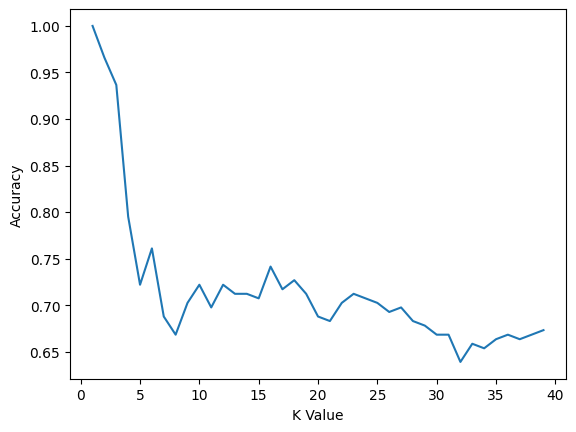

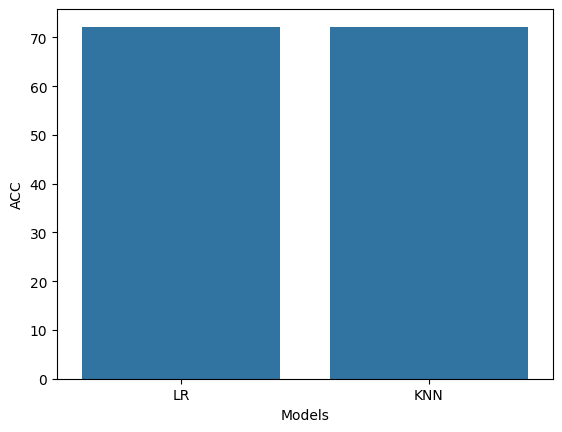

Disease
[1]


In [3]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
import tkinter as tk

# Load dataset
heart_data = pd.read_csv("C:/Users/yeshw/Desktop/Heart disease Prediction/archive/heart.csv")
print(heart_data.head())  # Print first 5 rows
print(heart_data.shape)  # Check number of rows and columns
print(heart_data.info())  # Get dataset information
print(heart_data.isnull().sum())  # Check for missing values
print(heart_data.describe())  # Statistical summary

# Check target value distribution
print(heart_data['target'].value_counts())

# Splitting the features and target
x = heart_data.drop(columns='target', axis=1) 
y = heart_data['target'] 

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)  
print('Logistic Regression:') 
x_train_prediction = model.predict(x_train) 
training_data_accuracy = accuracy_score(x_train_prediction, y_train) 
print('Accuracy on training data:', training_data_accuracy) 
x_test_prediction = model.predict(x_test) 
test_data_accuracy = accuracy_score(x_test_prediction, y_test) 
print('Accuracy on test data:', test_data_accuracy)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print('KNN:') 
x_train_prediction = knn.predict(x_train) 
training_data_accuracy = accuracy_score(x_train_prediction, y_train) 
print('Accuracy on training data:', training_data_accuracy) 
x_test_prediction = knn.predict(x_test) 
test_data_accuracy = accuracy_score(x_test_prediction, y_test) 
print('Accuracy on test data:', test_data_accuracy)

# Finding the best K value
score = [] 
for k in range(1, 40): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test) 
    score.append(accuracy_score(y_test, y_pred)) 
plt.plot(range(1, 40), score) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy") 
plt.show()

# Model comparison
final_data = pd.DataFrame({'Models': ['LR', 'KNN'], 'ACC': [test_data_accuracy * 100, test_data_accuracy * 100]})
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

# Testing with new data
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]
})
p = knn.predict(new_data)
print("No Disease" if p[0] == 0 else "Disease")

# Save the model
joblib.dump(knn, 'model_joblib_heart')
model = joblib.load('model_joblib_heart')
print(model.predict(new_data))

# GUI for Prediction
def show_entry_fields():
    entries = [int(e.get()) if i < 12 else float(e.get()) for i, e in enumerate(entries_list)]
    model = joblib.load('model_joblib_heart')
    result = model.predict([entries])
    result_text = "No Heart Disease" if result[0] == 0 else "Possibility of Heart Disease"
    result_label.config(text=result_text)

root = tk.Tk()
root.title("Heart Disease Prediction System")

# Header
header_label = tk.Label(root, text="Heart Disease Prediction System", bg="black", fg="white")
header_label.grid(row=0, columnspan=2)

# Labels and Entries
labels = ["Enter Your Age", "Male Or Female [1/0]", "Enter Value of CP", "Enter Value of trestbps", "Enter Value of chol", "Enter Value of fbs", "Enter Value of restecg", "Enter Value of thalach", "Enter Value of exang", "Enter Value of oldpeak", "Enter Value of slope", "Enter Value of ca", "Enter Value of thal"]
entries_list = []
for i, label in enumerate(labels):
    tk.Label(root, text=label).grid(row=i+1, column=0)
    entry = tk.Entry(root)
    entry.grid(row=i+1, column=1)
    entries_list.append(entry)

# Predict Button
predict_button = tk.Button(root, text="Predict", command=show_entry_fields)
predict_button.grid(row=len(labels)+1, column=0, columnspan=2)

# Result Label
result_label = tk.Label(root, text="", font=("Arial", 16))
result_label.grid(row=len(labels)+2, columnspan=2)

root.mainloop()